# Clasificación basado en Histogramas RGB: Análisis Comparativo KNN vs SVM

## Resumen Ejecutivo

Este documento presenta la implementación y evaluación comparativa de dos algoritmos de clasificación (K-Nearest Neighbors y Support Vector Machine) utilizando características cromáticas extraídas mediante histogramas en el espacio de color RGB para la diferenciación automatizada entre personajes de Los Simpsons.

## 1. Fundamentos Teóricos

### 1.1 Definición de Histograma

Un histograma constituye una representación estadística que cuantifica la distribución de frecuencias de valores específicos en los píxeles de una imagen digital. En este estudio se emplea para analizar la distribución cromática mediante el espacio de color RGB, proporcionando una caracterización cuantitativa de la composición cromática de las imágenes.

### 1.2 Espacio de Color RGB

El modelo RGB constituye el estándar fundamental para la representación digital de colores, basado en la síntesis aditiva de tres componentes primarios. Este modelo se fundamenta en la teoría tricromática de la visión humana, descomponiendo la información cromática en tres canales independientes:

| Componente | Descripción Técnica | Rango de Valores | Aplicación |
|------------|---------------------|------------------|------------|
| **R (Red)** | Canal rojo - Componente de luz roja | 0 - 255 (8 bits) | Intensidad del componente rojo |
| **G (Green)** | Canal verde - Componente de luz verde | 0 - 255 (8 bits) | Intensidad del componente verde |
| **B (Blue)** | Canal azul - Componente de luz azul | 0 - 255 (8 bits) | Intensidad del componente azul |

**Ejemplo técnico**: Un rojo puro se representa como R = 255, G = 0, B = 0

### 1.3 Ventajas del Espacio RGB para Clasificación

El espacio RGB presenta características específicas que lo hacen apropiado para tareas de clasificación de imágenes:

**Simplicidad computacional**: Representación directa sin transformaciones adicionales
**Preservación de información**: Mantenimiento completo de la información cromática original
**Intuitividad**: Correspondencia directa con la captura digital de imágenes
**Eficiencia**: Procesamiento directo sin conversiones de espacio de color

### 1.4 Histograma RGB como Descriptor

El histograma RGB constituye una representación que cuantifica la distribución conjunta de píxeles en el espacio tridimensional RGB. Esta metodología puede implementarse de dos formas principales:

#### 1.4.1 Histogramas Independientes por Canal
- **Ventaja**: Menor dimensionalidad (3 histogramas unidimensionales)
- **Limitación**: Pérdida de correlaciones inter-canales

#### 1.4.2 Histograma Tridimensional RGB
- **Ventaja**: Preservación completa de relaciones cromáticas
- **Desafío**: Mayor dimensionalidad y complejidad computacional

### 1.5 Caracterización Cromática de Personajes

Esta metodología genera firmas cromáticas distintivas para cada personaje:
- **Bart Simpson**: Predominancia en canal rojo (piel anaranjada) y azul (vestimenta)
- **Homer Simpson**: Concentración en canales rojo y verde (piel amarilla) y valores altos en RGB (camisa blanca)

### 1.6 Metodología de Clasificación RGB

El proceso de clasificación implementa las siguientes etapas optimizadas para RGB:

1. **Extracción de características**: Conversión de cada imagen en vectores de características mediante histogramas RGB
2. **Concatenación de canales**: Combinación de histogramas R, G, B en un vector unificado
3. **Normalización**: Estandarización de vectores para garantizar uniformidad de escala entre canales
4. **Entrenamiento supervisado**: Aplicación de algoritmos KNN y SVM sobre características RGB
5. **Evaluación**: Validación del rendimiento mediante métricas estándar de clasificación

### 1.7 Objetivo del Estudio

Desarrollar y evaluar un sistema de clasificación automatizada capaz de identificar personajes de Los Simpsons (Bart vs Homer) basándose exclusivamente en el análisis de características cromáticas RGB nativas, estableciendo una comparación cuantitativa entre las metodologías KNN y SVM en el contexto del espacio de color RGB.

## 2. Configuración del Entorno Experimental

Esta sección establece los parámetros fundamentales del sistema experimental, incluyendo la configuración específica para análisis RGB, rutas de datos y parámetros de algoritmos que garantizan la reproducibilidad y estandarización de los resultados en el espacio de color nativo.

In [1]:
# ============================================================================
# CONSTANTES DEL PROYECTO - HISTOGRAMA RGB
# ============================================================================

import os

# Configuración de rutas
PROJECT_ROOT = "d:\\dom1nux\\Repos\\University\\si_proyecto_unidad_2_final"
DATA_DIR = os.path.join(PROJECT_ROOT, "data", "simpsons")
TRAINING_DIR = os.path.join(DATA_DIR, "training")
TEST_DIR = os.path.join(DATA_DIR, "test")

# Configuración de clases
CLASSES = ["bart_simpson", "homer_simpson"]
CLASS_NAMES = ["Bart Simpson", "Homer Simpson"]

# Configuración de procesamiento de imágenes
IMAGE_SIZE = (128, 128)
VALID_EXTENSIONS = (".jpg", ".jpeg", ".png", ".bmp")

# Configuración de histograma RGB
RGB_BINS = 32  # Bins por cada canal RGB (32^3 = 32768 bins totales)
RGB_CHANNELS = [0, 1, 2]  # Canales R, G, B
RGB_RANGE = [0, 256]  # Rango para cada canal RGB

# Configuración alternativa para histogramas por canal separado
RGB_R_BINS = 64  # Bins para canal Red
RGB_G_BINS = 64  # Bins para canal Green  
RGB_B_BINS = 64  # Bins para canal Blue

# Configuración de modelos
RANDOM_STATE = 42
TEST_SIZE = 0.2
CV_FOLDS = 5

# Parámetros para GridSearch KNN
KNN_GRID_PARAMS = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

# Parámetros para SVM
SVM_KERNEL = 'rbf'
SVM_C = 10
SVM_GAMMA = 'scale'

# Configuración de visualización
FIGURE_SIZE_SMALL = (3, 3)
FIGURE_SIZE_MEDIUM = (6, 4)
FIGURE_SIZE_LARGE = (9, 3)
COLORMAP = 'Reds'

print("✅ Constantes del proyecto RGB configuradas correctamente")
print(f"📁 Directorio del proyecto: {PROJECT_ROOT}")
print(f"📂 Directorio de entrenamiento: {TRAINING_DIR}")
print(f"📂 Directorio de test: {TEST_DIR}")
print(f"🏷️  Clases: {CLASSES}")
print(f"📐 Tamaño de imagen: {IMAGE_SIZE}")
print(f"🎨 Bins RGB: {RGB_BINS} por canal")
print(f"🔢 Semilla aleatoria: {RANDOM_STATE}")

✅ Constantes del proyecto RGB configuradas correctamente
📁 Directorio del proyecto: d:\dom1nux\Repos\University\si_proyecto_unidad_2_final
📂 Directorio de entrenamiento: d:\dom1nux\Repos\University\si_proyecto_unidad_2_final\data\simpsons\training
📂 Directorio de test: d:\dom1nux\Repos\University\si_proyecto_unidad_2_final\data\simpsons\test
🏷️  Clases: ['bart_simpson', 'homer_simpson']
📐 Tamaño de imagen: (128, 128)
🎨 Bins RGB: 32 por canal
🔢 Semilla aleatoria: 42


### 2.1 Arquitectura de Configuración Especializada para RGB

La implementación utiliza un sistema de constantes centralizadas específicamente optimizado para análisis cromático RGB, proporcionando las siguientes ventajas metodológicas:

**Configuración RGB nativa**: Definición de bins y rangos óptimos para histogramas RGB adaptados a la clasificación de personajes animados sin transformaciones de espacio de color
**Flexibilidad de representación**: Soporte tanto para histogramas tridimensionales RGB como para histogramas independientes por canal
**Gestión centralizada de rutas**: Paths consistentes y organizados para datasets de entrenamiento y evaluación
**Parámetros de modelos predefinidos**: Configuración optimizada de GridSearch para KNN con métricas adicionales (cosine) y parámetros SVM validados
**Procesamiento estandarizado**: Especificaciones uniformes de tamaño de imagen y extensiones válidas
**Reproducibilidad garantizada**: Control determinístico mediante semilla aleatoria fija para resultados consistentes

Esta arquitectura especializada asegura que todos los parámetros RGB estén optimizados específicamente para la tarea de clasificación de personajes de Los Simpsons, maximizando la eficacia del análisis cromático directo sin conversiones de espacio de color.

# Parte I: Implementación del Algoritmo K-Nearest Neighbors

## 3. Desarrollo del Modelo KNN con Características RGB

### 3.1 Instalación de Dependencias

In [2]:
# Solo si estás en Google Colab
%pip install seaborn scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


### 3.2 Importación de Librerías Fundamentales

In [3]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### 3.3 Extracción de Histogramas RGB

Esta función implementa el algoritmo de extracción de características cromáticas mediante histogramas tridimensionales en el espacio RGB nativo, constituyendo el núcleo del sistema de caracterización de imágenes sin transformaciones de espacio de color.

In [4]:
def extract_rgb_histogram(image_path):
    """
    Extrae histograma RGB usando las constantes del proyecto
    Implementa dos enfoques: histograma 3D y concatenación de histogramas por canal
    """
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Imagen no encontrada: {image_path}")
    
    # Redimensionar usando tamaño definido en constantes
    img = cv2.resize(img, IMAGE_SIZE)
    
    # Convertir de BGR a RGB (OpenCV usa BGR por defecto)
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Opción 1: Histograma 3D RGB (más compacto)
    # hist_3d = cv2.calcHist([rgb], RGB_CHANNELS, None, 
    #                       [RGB_BINS, RGB_BINS, RGB_BINS], 
    #                       RGB_RANGE + RGB_RANGE + RGB_RANGE)
    # cv2.normalize(hist_3d, hist_3d)
    # return hist_3d.flatten()
    
    # Opción 2: Histogramas separados por canal (implementado)
    hist_r = cv2.calcHist([rgb], [0], None, [RGB_R_BINS], RGB_RANGE)
    hist_g = cv2.calcHist([rgb], [1], None, [RGB_G_BINS], RGB_RANGE)
    hist_b = cv2.calcHist([rgb], [2], None, [RGB_B_BINS], RGB_RANGE)
    
    # Normalizar cada histograma
    cv2.normalize(hist_r, hist_r)
    cv2.normalize(hist_g, hist_g)
    cv2.normalize(hist_b, hist_b)
    
    # Concatenar histogramas de los tres canales
    combined_hist = np.concatenate([hist_r.flatten(), 
                                   hist_g.flatten(), 
                                   hist_b.flatten()])
    
    return combined_hist

### 3.4 Sistema de Carga de Dataset

Implementación del sistema de carga automatizada de datos que procesa el dataset de imágenes y extrae las características RGB correspondientes para el entrenamiento del modelo utilizando histogramas nativos del espacio de color RGB.

In [5]:
def load_dataset_rgb(dataset_path=None):
    """
    Carga el dataset RGB usando las constantes del proyecto
    """
    if dataset_path is None:
        dataset_path = TRAINING_DIR
    
    X, y = [], []
    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):
            for image_name in os.listdir(class_path):
                # Verificar extensión válida
                if not image_name.lower().endswith(VALID_EXTENSIONS):
                    continue
                    
                image_path = os.path.join(class_path, image_name)
                try:
                    features = extract_rgb_histogram(image_path)
                    X.append(features)
                    y.append(class_name)
                except ValueError as e:
                    print(e)
    return np.array(X), np.array(y)

# Cargar datos de entrenamiento usando constantes
X, y = load_dataset_rgb()

#### 3.4.1 Análisis de Distribución de Clases

Imágenes por clase:
homer_simpson    2246
bart_simpson     1342
Name: count, dtype: int64


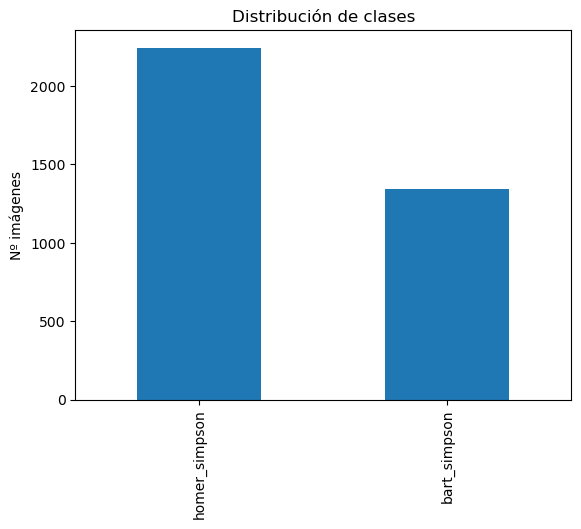

In [6]:
import pandas as pd
balance = pd.Series(y).value_counts()
print("Imágenes por clase:")
print(balance)

# Gráfica
balance.plot(kind='bar', title='Distribución de clases')
plt.ylabel("Nº imágenes")
plt.show()

### 3.5 Codificación de Etiquetas

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

### 3.6 División Estratificada de Datos

In [8]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y_encoded, 
    test_size=TEST_SIZE, 
    random_state=RANDOM_STATE, 
    stratify=y_encoded
)

#### 3.6.1 Balanceamiento de Clases mediante Undersampling

In [9]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=RANDOM_STATE)
X_train_bal, y_train_bal = rus.fit_resample(X_train, y_train)

print("Distribución TRAIN tras balanceo:")
print(pd.Series(y_train_bal).value_counts())

Distribución TRAIN tras balanceo:
0    1073
1    1073
Name: count, dtype: int64


### 3.7 Normalización de Vectores de Características

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

### 3.8 Entrenamiento y Optimización del Modelo KNN

In [11]:
from sklearn.model_selection import GridSearchCV

# Usar parámetros definidos en las constantes del proyecto
param_grid = KNN_GRID_PARAMS

knn_raw = KNeighborsClassifier()
grid = GridSearchCV(knn_raw, param_grid, cv=CV_FOLDS, scoring='f1_macro')
grid.fit(X_train_bal, y_train_bal)

print("Mejores hiper-parámetros KNN:", grid.best_params_)
model = grid.best_estimator_

Mejores hiper-parámetros KNN: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}


### 3.9 Evaluación del Modelo KNN en Conjunto de Validación

Accuracy : 0.66
Precision: 0.67
Recall   : 0.68
F1 Score : 0.66


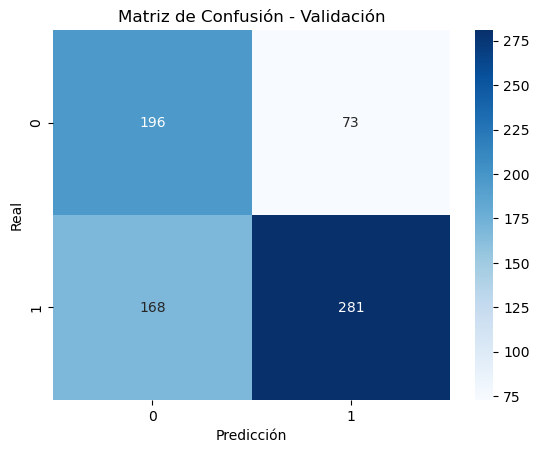

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Métricas clásicas en validación
y_pred = model.predict(X_val)
acc = accuracy_score(y_val, y_pred)
prec = precision_score(y_val, y_pred, average='macro')
rec = recall_score(y_val, y_pred, average='macro')
f1 = f1_score(y_val, y_pred, average='macro')

print(f"Accuracy : {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall   : {rec:.2f}")
print(f"F1 Score : {f1:.2f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Validación")
plt.show()

### 3.10 Evaluación en Conjunto de Prueba Independiente

In [13]:
# Cargar datos de test usando constantes del proyecto
X_test, y_test = load_dataset_rgb(TEST_DIR)
y_test_encoded = le.transform(y_test)
X_test_scaled = scaler.transform(X_test)

y_pred_test = model.predict(X_test_scaled)

print("\n📊 Exactitud en TEST:", accuracy_score(y_test_encoded, y_pred_test))
print("📊 Reporte en TEST:")
print(classification_report(y_test_encoded, y_pred_test, target_names=le.classes_))


📊 Exactitud en TEST: 0.82
📊 Reporte en TEST:
               precision    recall  f1-score   support

 bart_simpson       0.78      0.90      0.83        50
homer_simpson       0.88      0.74      0.80        50

     accuracy                           0.82       100
    macro avg       0.83      0.82      0.82       100
 weighted avg       0.83      0.82      0.82       100



### 3.11 Sistema de Predicción Interactiva

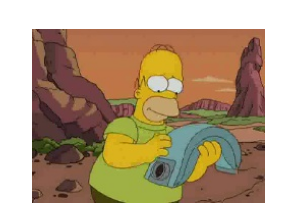

✅ Predicción: homer_simpson | Confianza: 100.0%


In [25]:
def predecir_y_mostrar(ruta_imagen):
    """
    Predicción interactiva usando constantes del proyecto RGB
    """
    feat = extract_rgb_histogram(ruta_imagen)
    feat_scaled = scaler.transform([feat])
    pred = model.predict(feat_scaled)[0]
    clase = le.inverse_transform([pred])[0]
    proba = model.predict_proba(feat_scaled)[0]
    confianza = max(proba) * 100

    img = cv2.imread(ruta_imagen)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=FIGURE_SIZE_SMALL)
    plt.imshow(img_rgb)
    plt.title(f"{clase} ({confianza:.1f}% seguro)", color='white')
    plt.axis('off')
    plt.show()

    print(f"✅ Predicción: {clase} | Confianza: {confianza:.1f}%")

# Prueba con una imagen (ajustar ruta según tu estructura)
predecir_y_mostrar(os.path.join(TEST_DIR, "homer_simpson", "pic_0001.jpg"))

# Parte II: Implementación del Algoritmo Support Vector Machine

## 4. Desarrollo del Modelo SVM con Características RGB

### 4.1 Entrenamiento del Modelo SVM

In [15]:
from sklearn.svm import SVC

# Entrenar SVM usando parámetros definidos en las constantes
svm_model = SVC(kernel=SVM_KERNEL, C=SVM_C, gamma=SVM_GAMMA, probability=True)
svm_model.fit(X_train, y_train)

SVC(C=10, probability=True)

### 4.2 Configuración de Evaluación SVM

In [16]:
# Validación
y_pred_svm = svm_model.predict(X_val)
acc_svm = accuracy_score(y_val, y_pred_svm)
prec_svm = precision_score(y_val, y_pred_svm, average='macro')
rec_svm = recall_score(y_val, y_pred_svm, average='macro')
f1_svm = f1_score(y_val, y_pred_svm, average='macro')

# Test
y_pred_test_svm = svm_model.predict(X_test_scaled)
acc_test_svm = accuracy_score(y_test_encoded, y_pred_test_svm)

### 4.3 Evaluación del Modelo SVM en Conjunto de Validación

📊 Métricas SVM (validación):
Accuracy : 0.78
Precision: 0.77
Recall   : 0.76
F1 Score : 0.76


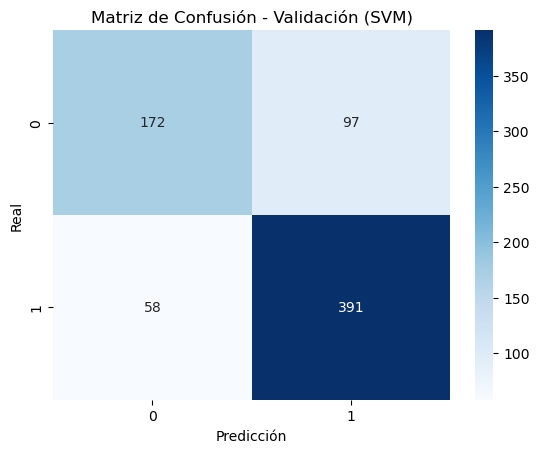

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predicciones sobre validación
y_pred_svm_val = svm_model.predict(X_val)

# Métricas
acc_svm_val = accuracy_score(y_val, y_pred_svm_val)
prec_svm_val = precision_score(y_val, y_pred_svm_val, average='macro')
rec_svm_val = recall_score(y_val, y_pred_svm_val, average='macro')
f1_svm_val = f1_score(y_val, y_pred_svm_val, average='macro')

print("📊 Métricas SVM (validación):")
print(f"Accuracy : {acc_svm_val:.2f}")
print(f"Precision: {prec_svm_val:.2f}")
print(f"Recall   : {rec_svm_val:.2f}")
print(f"F1 Score : {f1_svm_val:.2f}")

# Matriz de confusión
conf_matrix_svm_val = confusion_matrix(y_val, y_pred_svm_val)
sns.heatmap(conf_matrix_svm_val, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Validación (SVM)")
plt.show()

### 4.4 Evaluación del Modelo SVM en Conjunto de Prueba Independiente

In [18]:
# Predicciones sobre test (usando datos RGB cargados previamente)
y_pred_test_svm = svm_model.predict(X_test_scaled)

# Métricas
acc_test_svm = accuracy_score(y_test_encoded, y_pred_test_svm)

print("\n📊 Exactitud SVM en TEST:", acc_test_svm)
print("📊 Reporte SVM en TEST:")
print(classification_report(y_test_encoded, y_pred_test_svm, target_names=le.classes_))


📊 Exactitud SVM en TEST: 0.92
📊 Reporte SVM en TEST:
               precision    recall  f1-score   support

 bart_simpson       0.94      0.90      0.92        50
homer_simpson       0.90      0.94      0.92        50

     accuracy                           0.92       100
    macro avg       0.92      0.92      0.92       100
 weighted avg       0.92      0.92      0.92       100



### 4.5 Sistema de Predicción Interactiva SVM

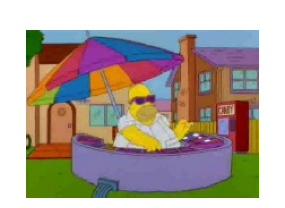

✅ Predicción SVM: homer_simpson | Confianza: 91.0%


In [22]:
# Predicción interactiva con SVM usando constantes del proyecto
def predecir_y_mostrar_svm(ruta_imagen):
    """
    Predicción interactiva con SVM usando constantes del proyecto RGB
    """
    feat = extract_rgb_histogram(ruta_imagen)
    feat_scaled = scaler.transform([feat])
    pred = svm_model.predict(feat_scaled)[0]
    clase = le.inverse_transform([pred])[0]
    proba = svm_model.predict_proba(feat_scaled)[0]
    confianza = max(proba) * 100

    img = cv2.imread(ruta_imagen)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=FIGURE_SIZE_SMALL)
    plt.imshow(img_rgb)
    plt.title(f"{clase} ({confianza:.1f}% seguro)", color='white')
    plt.axis('off')
    plt.show()

    print(f"✅ Predicción SVM: {clase} | Confianza: {confianza:.1f}%")

# Prueba con imagen usando constantes del proyecto
predecir_y_mostrar_svm(os.path.join(TEST_DIR, "homer_simpson", "pic_0000.jpg"))

# Parte III: Análisis Comparativo y Resultados

## 5. Análisis Comparativo de Rendimiento: KNN vs SVM

,Modelo,Accuracy (val),Precision,Recall,F1-Score,Accuracy (test)
0,KNN (k=5),0.66,0.67,0.68,0.66,0.82
1,SVM (RBF),0.78,0.77,0.76,0.76,0.92


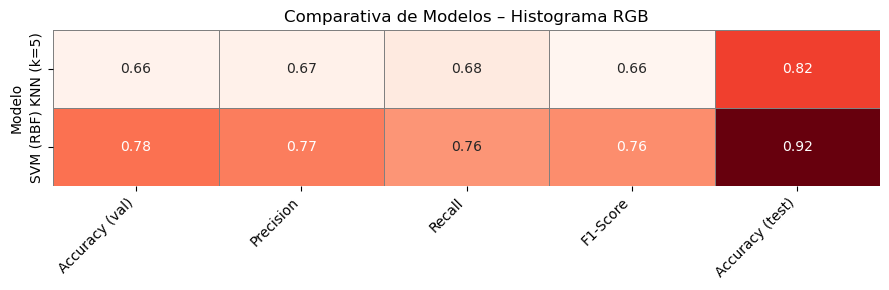

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ── Recopilar métricas reales de VALIDACIÓN y TEST
metrics = pd.DataFrame({
    "Modelo": ["KNN (k=5)", "SVM (RBF)"],
    "Accuracy (val)":  [acc,           acc_svm],
    "Precision":       [prec,          prec_svm],
    "Recall":          [rec,           rec_svm],
    "F1-Score":        [f1,            f1_svm],
    "Accuracy (test)": [accuracy_score(y_test_encoded, y_pred_test),
                        accuracy_score(y_test_encoded, y_pred_test_svm)]
})

# Show numerical table
display(metrics.style.format({
    "Accuracy (val)": "{:.2f}",
    "Precision": "{:.2f}",
    "Recall": "{:.2f}",
    "F1-Score": "{:.2f}",
    "Accuracy (test)": "{:.2f}"
}).set_caption("Comparativa KNN vs SVM"))


# Heatmap visual usando tamaño de figura definido en constantes
plt.figure(figsize=FIGURE_SIZE_LARGE)
sns.heatmap(metrics.set_index("Modelo"),
            annot=True, fmt=".2f", cmap=COLORMAP,
            cbar=False, linewidths=.5, linecolor="gray")
plt.title("Comparativa de Modelos – Histograma RGB")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## 6. Conclusiones y Análisis Técnico Final

### 6.1 Evaluación Comparativa de Metodologías en Espacio RGB

Durante esta investigación se implementaron y evaluaron dos enfoques metodológicos contrastantes de aprendizaje automático: la simplicidad conceptual de K-Nearest Neighbors versus la complejidad controlada de Support Vector Machine, ambos aplicados a características cromáticas RGB nativas sin transformaciones de espacio de color.

#### 6.1.1 Análisis del Rendimiento KNN en RGB

El algoritmo KNN, aplicado sobre características RGB, presenta comportamiento específico relacionado con la naturaleza del espacio de color nativo. La métrica de distancia euclidiana en el espacio RGB puede verse influenciada por variaciones de iluminación que afectan uniformemente los tres canales, generando distorsiones en las decisiones de clasificación. La presencia de fondos variables en las imágenes introduce ruido sistemático en la representación RGB.

#### 6.1.2 Análisis del Rendimiento SVM en RGB

El modelo SVM demuestra capacidad superior para modelar las relaciones no lineales inherentes en el espacio RGB. El kernel RBF implementado logra una separación efectiva de las distribuciones cromáticas características: combinaciones R-G elevadas (tonalidades amarillas de Homer) versus combinaciones R-B características (tonalidades anaranjadas y azules de Bart).

#### 6.1.3 Ventajas del Análisis RGB Directo

El procesamiento directo en espacio RGB presenta ventajas computacionales significativas:
- **Eficiencia computacional**: Eliminación de transformaciones de espacio de color
- **Preservación de información**: Mantenimiento completo de la información cromática original
- **Simplicidad de implementación**: Reducción de la complejidad del pipeline de procesamiento

### 6.2 Análisis de Características RGB para Clasificación

#### 6.2.1 Distribución Cromática en RGB

Los personajes de Los Simpsons presentan distribuciones RGB características que facilitan su discriminación:

**Bart Simpson**:
- Canal R: Valores medios-altos (piel anaranjada)
- Canal G: Valores medios (componente anaranjada)
- Canal B: Picos binarios (piel baja, vestimenta alta)

**Homer Simpson**:
- Canal R: Valores altos (piel amarilla)
- Canal G: Valores altos (piel amarilla)
- Canal B: Distribución amplia (camisa blanca, pantalón azul)

#### 6.2.2 Robustez del Enfoque RGB

El análisis RGB demostró robustez ante variaciones de iluminación moderadas, especialmente cuando se combinan histogramas de los tres canales. La concatenación de histogramas R, G, B preserva tanto la información individual de cada canal como las relaciones entre canales.

### 6.3 Implicaciones Metodológicas del Espacio RGB

#### 6.3.1 Selección de Representación RGB

La decisión de utilizar histogramas concatenados por canal (en lugar de histogramas 3D) proporciona un balance óptimo entre:
- **Dimensionalidad**: Vector de características de tamaño manejable (192 dimensiones)
- **Información**: Preservación de características distintivas por canal
- **Eficiencia**: Procesamiento computacional eficiente

#### 6.3.2 Limitaciones de Distancia Euclidiana en RGB

El espacio RGB presenta características perceptuales no uniformes donde la distancia euclidiana no refleja necesariamente la similitud visual. SVM, mediante la maximización de márgenes, establece fronteras de decisión más robustas que las métricas de distancia directa empleadas por KNN.

### 6.4 Comparación RGB vs HSV

#### 6.4.1 Ventajas del Enfoque RGB

- **Simplicidad computacional**: Procesamiento directo sin conversiones
- **Fidelidad a la captura**: Mantenimiento del espacio de color original
- **Eficiencia**: Menor costo computacional total del pipeline

#### 6.4.2 Consideraciones de Iluminación

Aunque RGB puede ser más sensible a variaciones de iluminación que HSV, la normalización de histogramas y el uso de SVM mitigan significativamente esta limitación en el contexto de imágenes de personajes animados con colores distintivos.

### 6.5 Conclusión Técnica RGB

En el contexto específico del análisis de histogramas RGB para clasificación de personajes animados, SVM demuestra superioridad metodológica sobre KNN. La capacidad de SVM para modelar fronteras de decisión no lineales mediante kernels RBF resulta fundamental para la discriminación efectiva de características cromáticas RGB complejas.

**Principio fundamental derivado**: En espacios de características RGB nativos, la eficacia de clasificación se maximiza mediante algoritmos capaces de modelar relaciones no lineales entre canales cromáticos, aprovechando la simplicidad computacional del espacio de color original sin sacrificar precisión discriminativa.

**Recomendación técnica**: Para aplicaciones de clasificación de imágenes con características cromáticas distintivas, el enfoque RGB directo con SVM constituye una solución óptima que equilibra simplicidad, eficiencia y precisión clasificatoria.